<center><h1>The Spark Foundation

<center><h2>Predict the percentage of an student based on the no. of study hours.

<h3>ML Algorithm = Simple Linear Regression
<h3>Problem To Be Solved = What will be predicted score if a student studies for 9.25 hrs/ day?

In [43]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
#importing and reaading the dataset
dataset = pd.read_csv("student_scores.csv")

In [45]:
#the first five values in the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [46]:
#number of rows and columns
dataset.shape

(25, 2)

In [47]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h2>Visualization Of Data

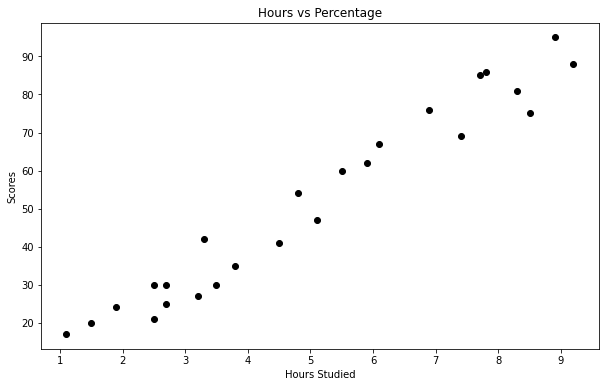

In [49]:
#Hours Vs Percentage of Scores
plt.figure(figsize=(10,6))
plt.scatter(dataset['Hours'], dataset['Scores'], c='black')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

Text(0, 0.5, 'Scores')

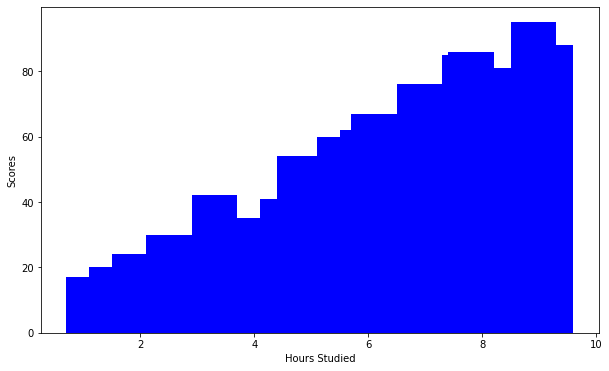

In [50]:
plt.figure(figsize=(10,6))
plt.bar(dataset['Hours'], dataset['Scores'], color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')

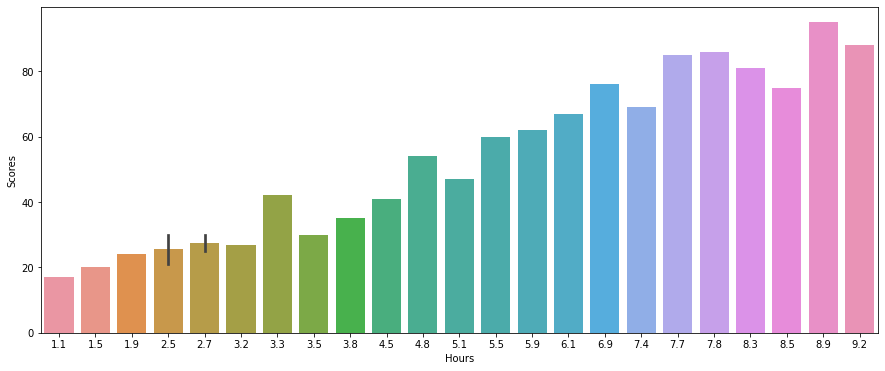

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x='Hours', y='Scores', data=dataset)

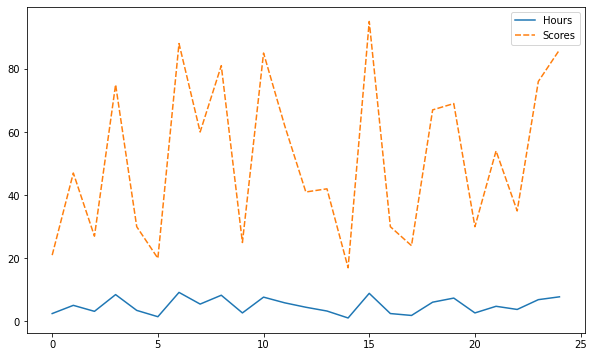

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dataset)

<h2>Train-Test separation of data

In [53]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

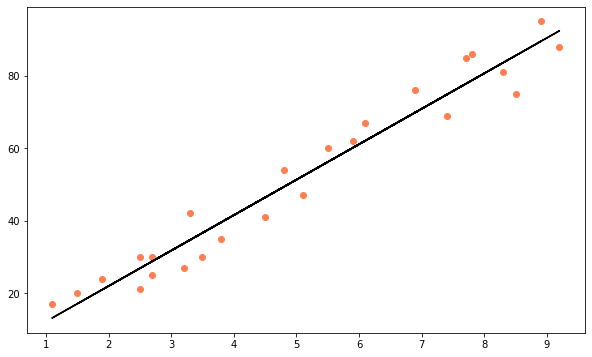

In [56]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='coral')
plt.plot(X, line,c = 'black');
plt.show()


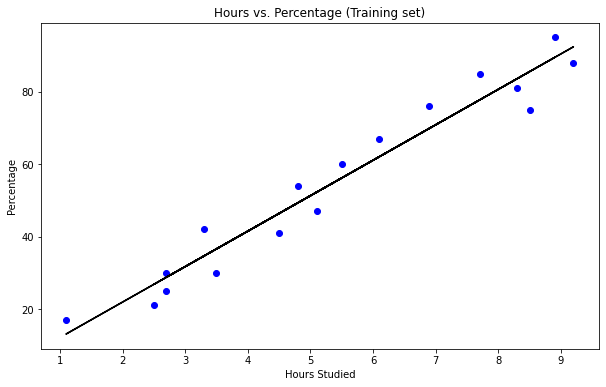

In [57]:
#Visualising the Training set results
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_train, regressor.predict(X_train), c='black')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

In [58]:
#Predicting the Test set results

y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


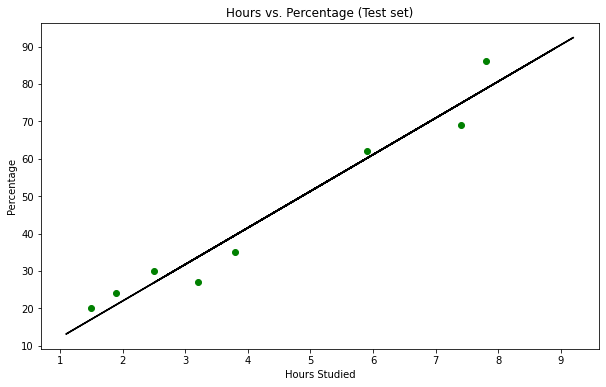

In [59]:
#Visualising the Test set results
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

In [60]:
#Comparing the actual values with the predicted ones.
ds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
ds

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


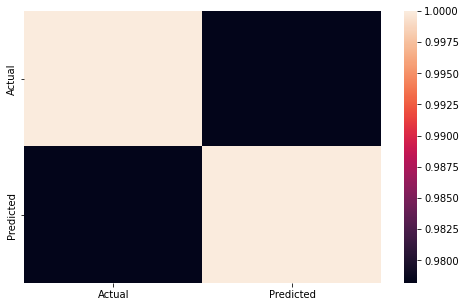

In [61]:
plt.figure(figsize=(8,5))
sns.heatmap(ds.corr())

<h2>Predicting the score if the student studies for 9.25 hours/day

In [62]:
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


<h2>Check the predicting score if the student studies for 6 hours/day

In [63]:
dataset = np.array(6)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 6 hours/day, the score is {}.".format(pred))

If the student studies for 6 hours/day, the score is [61.1022155].


## Conclusion:
### We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91.